In [1]:
# Add Matplotlib inline magic command
%matplotlib notebook
%matplotlib inline
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#importing files
red_light_camera=pd.read_csv("../Resources/red_light_camera.csv")

In [3]:
#creating copy of data
df_red_light_camera=red_light_camera.copy()

In [4]:
pd.options.display.max_columns = None         # to print all columns

In [5]:
#Info of dataframe
df_red_light_camera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  214 non-null    int64  
 1   INTERSECTION_ID     207 non-null    float64
 2   LINEAR_NAME_FULL_1  207 non-null    object 
 3   LINEAR_NAME_FULL_2  207 non-null    object 
 4   ID1                 214 non-null    int64  
 5   X                   0 non-null      float64
 6   Y                   0 non-null      float64
 7   LONGITUDE           0 non-null      float64
 8   LATITUDE            0 non-null      float64
 9   OBJECTID            214 non-null    int64  
 10  geometry            214 non-null    object 
 11  MID_BLOCK           3 non-null      object 
 12  POLICE_DIVISION_2   26 non-null     float64
 13  POLICE_DIVISION_3   1 non-null      float64
 14  ACTIVATION_DATE     214 non-null    object 
 15  ACTIVATION_TIME     214 non-null    object 
 16  SIDE2   

In [6]:
#Getting only Longitude and Latitude values in geometry2 column
import re
df_red_light_camera["geometry2"] = df_red_light_camera["geometry"].str.extract(r"\((.*?)\)")

In [7]:
# split geometry2 into two columns: long & Lat
df_red_light_camera[['Longitude', 'Latitude']] = df_red_light_camera['geometry2'].str.split(',', 1, expand=True)

In [8]:
# Standardize Lat & Long Length to match between the files
df_red_light_camera['Longitude']=df_red_light_camera.Longitude.map(lambda l: l[:8])
df_red_light_camera['Latitude']=df_red_light_camera.Latitude.map(lambda l: l[:8].replace(" ",''))

In [9]:
#Changing datatype tp float for Latitude and Longitude columns
df_red_light_camera=df_red_light_camera.astype({'Longitude':'float','Latitude':'float'})

In [10]:
#Checking number of uniques
df_red_light_camera.nunique()

id                    214
INTERSECTION_ID       202
LINEAR_NAME_FULL_1     70
LINEAR_NAME_FULL_2    126
ID1                   214
X                       0
Y                       0
LONGITUDE               0
LATITUDE                0
OBJECTID              214
geometry              209
MID_BLOCK               3
POLICE_DIVISION_2      10
POLICE_DIVISION_3       1
ACTIVATION_DATE        89
ACTIVATION_TIME         2
SIDE2                  32
CLIENT_STREET_2       133
CLIENT_STREET_1        73
SIDE1                 133
MI_PRINX              214
PRIVATE_ACCESS          6
TCS                   209
ADDITIONAL_INFO         8
POLICE_DIVISION_1      17
WARD_1                 26
WARD_3                  0
WARD_2                 18
WARD_4                  0
NAME                  209
DISTRICT                4
RLC                   214
MAIN                   73
geometry2             209
Longitude             206
Latitude              201
dtype: int64

In [11]:
#Checking the total nulls in each column
df_red_light_camera.isnull().sum()

id                      0
INTERSECTION_ID         7
LINEAR_NAME_FULL_1      7
LINEAR_NAME_FULL_2      7
ID1                     0
X                     214
Y                     214
LONGITUDE             214
LATITUDE              214
OBJECTID                0
geometry                0
MID_BLOCK             211
POLICE_DIVISION_2     188
POLICE_DIVISION_3     213
ACTIVATION_DATE         0
ACTIVATION_TIME         0
SIDE2                 175
CLIENT_STREET_2         0
CLIENT_STREET_1         0
SIDE1                   0
MI_PRINX                0
PRIVATE_ACCESS        208
TCS                     0
ADDITIONAL_INFO       206
POLICE_DIVISION_1       0
WARD_1                  0
WARD_3                214
WARD_2                178
WARD_4                214
NAME                    0
DISTRICT                0
RLC                     0
MAIN                    0
geometry2               0
Longitude               0
Latitude                0
dtype: int64

In [12]:
#Dropping the column not playing any role in analysis: may cause noise
df_red_light_camera.drop(["id","LINEAR_NAME_FULL_1","LINEAR_NAME_FULL_2","ID1","X","Y","LONGITUDE","LATITUDE","OBJECTID","MID_BLOCK","POLICE_DIVISION_2","POLICE_DIVISION_3","SIDE2","SIDE1","MI_PRINX","PRIVATE_ACCESS","ADDITIONAL_INFO","POLICE_DIVISION_1","WARD_1","WARD_2","WARD_3","WARD_4","MAIN","TCS","CLIENT_STREET_2","CLIENT_STREET_1","geometry2","geometry","ACTIVATION_TIME"], axis = 1, inplace = True)

In [13]:
#Checking the info again
df_red_light_camera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INTERSECTION_ID  207 non-null    float64
 1   ACTIVATION_DATE  214 non-null    object 
 2   NAME             214 non-null    object 
 3   DISTRICT         214 non-null    object 
 4   RLC              214 non-null    int64  
 5   Longitude        214 non-null    float64
 6   Latitude         214 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 11.8+ KB


In [14]:
#Changing the Data type of Activation_Date Column to Date
df_red_light_camera['ACTIVATION_DATE'] = pd.to_datetime(df_red_light_camera['ACTIVATION_DATE'])

In [15]:
#Retrieving Month and Year in separate columns from ACTIVATION_DATE column
df_red_light_camera["Month"]=df_red_light_camera['ACTIVATION_DATE'].dt.month_name()
df_red_light_camera["Year"]=df_red_light_camera['ACTIVATION_DATE'].dt.year

In [16]:
#Checking the data after cleaning
df_red_light_camera.head()

,INTERSECTION_ID,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month,Year
0,13465959.0,2007-11-09,Richmond St E And Parliament St,Toronto and East York,6001,-79.3640,43.6545,November,2007
1,13467993.0,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007
2,13444656.0,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007
3,13444138.0,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007
4,13451893.0,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007


In [17]:
#We can drop INTERSECTION_ID as it is unique.
df_red_light_camera.drop(["INTERSECTION_ID"],axis=1,inplace=True)

In [18]:
#Grouping by Year to check how many Red Lights activated since 2007
total_cameras_per_year=df_red_light_camera.groupby(by="Year",as_index=False)["RLC"].count()
total_cameras_per_year

,Year,RLC
0,2007,6
1,2008,26
2,2009,33
3,2010,3
4,2011,1
5,2017,66
6,2018,6
7,2019,4
8,2020,2
9,2021,63


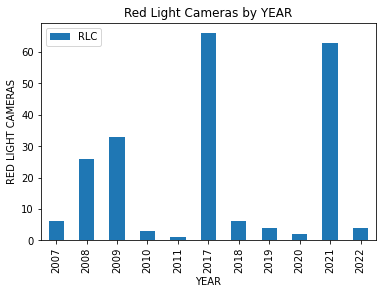

In [19]:
# Create the plot.
total_cameras_per_year.plot("Year","RLC",kind="bar")
# Create labels for the x and y axes.
plt.xlabel("YEAR")
plt.ylabel("RED LIGHT CAMERAS")
# Create a title.
plt.title("Red Light Cameras by YEAR")
plt.xticks(rotation=90)
# Add the legend.
plt.legend()
plt.show()

In [20]:
#Grouping by Month to check how many Red Lights activated by month
total_cameras_by_month=df_red_light_camera.groupby(by="Month",as_index=False)["RLC"].count()
total_cameras_by_month

,Month,RLC
0,April,9
1,August,36
2,December,12
3,February,2
4,January,3
5,July,15
6,June,25
7,March,48
8,May,14
9,November,16


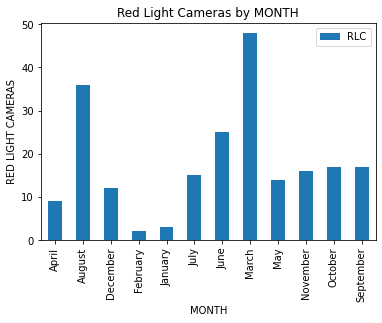

In [21]:
# Create the plot.
total_cameras_by_month.plot(x="Month", y="RLC", kind="bar")
# Create labels for the x and y axes.
plt.xlabel("MONTH")
plt.ylabel("RED LIGHT CAMERAS")
# Create a title.
plt.title("Red Light Cameras by MONTH")
plt.xticks(rotation=90)
# Add the legend.
plt.legend()
plt.show()

In [22]:
#Which District got the Red Light Cameras and on which date
total_cameras_by_date_district=df_red_light_camera.groupby(["ACTIVATION_DATE","DISTRICT"],as_index=False)["RLC"].count()
total_cameras_by_date_district

,ACTIVATION_DATE,DISTRICT,RLC
0,2007-11-09,Etobicoke York,1
1,2007-11-09,North York,3
2,2007-11-09,Toronto and East York,2
3,2008-03-18,Etobicoke York,1
4,2008-03-18,Scarborough,1
...,...,...,...
140,2021-12-29,North York,1
141,2021-12-29,Scarborough,2
142,2022-03-17,Scarborough,2
143,2022-03-17,Toronto and East York,1


In [23]:
#Grouped By District to get total cameras for each District
total_cameras_district=pd.DataFrame(df_red_light_camera.groupby(["DISTRICT"]).count()[["RLC"]])
total_cameras_district

,RLC
DISTRICT,
Etobicoke York,55
North York,40
Scarborough,80
Toronto and East York,39


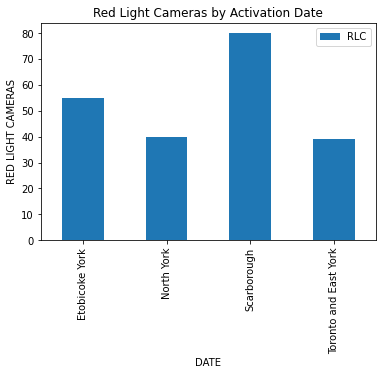

<Figure size 432x288 with 0 Axes>

In [24]:
# Create the plot.
total_cameras_district.plot(kind="bar")
# Create labels for the x and y axes.
plt.xlabel("DATE")
plt.ylabel("RED LIGHT CAMERAS")
# Create a title.
plt.title("Red Light Cameras by Activation Date")
plt.xticks(rotation=90)
# Add the legend.
plt.legend()
plt.show()
plt.tight_layout()

In [26]:
#Exporting Cleaned data to csv
df_red_light_camera.to_csv("../Resources/df_red_light_camera.csv",index=False)